# F20M/F21ML Coursework 2
## Part III: Deep Learning with Keras for Detecting COVID19 from XRay Images

- This notebook should be uploaded to Google Colab so that you can use GPU resources to accelerate the training for CNNs. 

In [ ]:
!pip install gdown  # gdown is used to download large files from google drive. 

## Download the Covid Xray dataset 
### Please note this dataset is based on a bigger one. Please don't distribute the dataset as it is only used for F20ML coursework. 

In [ ]:
!gdown https://drive.google.com/uc?id=1GOaQpIZsFKNCkl1E3d01Bmxz_8FPoIeJ  # Covid and Normal data
#!gdown https://drive.google.com/uc?id=1Xa4IxZy5o-eUPmadnrjlJZPHe9oRw2Ol   # balanced dataset

Downloading...
From: https://drive.google.com/uc?id=1GOaQpIZsFKNCkl1E3d01Bmxz_8FPoIeJ
To: /content/COVID19Subset.zip
100% 518M/518M [00:03<00:00, 163MB/s]


In [ ]:
# mount drive ###
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Extract the zip file

In [ ]:
import os
import zipfile
import numpy as np


local_zip = '/content/drive/MyDrive/Colab Notebooks/COVID19Subset.zip'  # you may need to change the path based on your own enviroment
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

### Loading data and perform data augmentation.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

path = '/content/COVID-19Subset' # you may need to change the path based on your own enviroment

classes=["COVID",  "Normal"]
num_classes = len(classes)
print(num_classes)
batch_size=32

#split data into train and test
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest", rescale=1./255, validation_split=0.2)

#load training image set
train_gen = datagen.flow_from_directory(directory=path, 
                                              target_size=(299, 299),
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True, classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="grayscale")
#load testing set
test_gen = datagen.flow_from_directory(directory=path, 
                                              target_size=(299, 299),
                                              class_mode='categorical',
                                              subset='validation',
                                              shuffle=True, classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="grayscale")




2
Found 11047 images belonging to 2 classes.
Found 2761 images belonging to 2 classes.


In [ ]:
###test cell 1 ###
from collections import Counter
Counter(train_gen.classes)

Counter({0: 2893, 1: 8154})

In [ ]:
import keras 
import tensorflow 
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Conv3D, MaxPooling3D,GlobalAveragePooling3D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras import backend as K
from __future__ import print_function
img_rows, img_cols = 299, 299
input_shape = (img_rows, img_cols, 1)

#TODO: compelte a CNN model using Keras in the following function

def my_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                  input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="same"))
  model.add(Conv2D(64, kernel_size=(3, 3),
                  activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2, 2), padding="same"))
  model.add(Conv2D(128,kernel_size=(3,3),
                  activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="same"))
  model.add(Conv2D(256,kernel_size=(3,3),
                  activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="same"))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  opt=SGD(lr=0.01)
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=opt,
                metrics=['accuracy'])
  return model 


  

  
    


In [ ]:
### test cell 3 ###
model=my_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 297, 297, 32)      320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 36, 36, 128)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# check if we are using GPU
import tensorflow as tf
tf.test.gpu_device_name()  # test if GPU is availabe. GPU will be much faster. 
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 106252541111765573
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8948570923246403179
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

In [ ]:
epoch=10 # choose the value for this hyperparameter wisely.

model = my_model() 


# fit the model
history1=model.fit(train_gen, steps_per_epoch=len(train_gen) // batch_size, validation_steps=len(test_gen) // batch_size, validation_data=test_gen, epochs=epoch,verbose=1)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
10/10 [==============================] - 8s 459ms/step - loss: 0.6439 - accuracy: 0.7094 - val_loss: 0.6144 - val_accuracy: 0.7344
Epoch 2/10
10/10 [==============================] - 4s 424ms/step - loss: 0.6093 - accuracy: 0.7188 - val_loss: 0.6634 - val_accuracy: 0.6406
Epoch 3/10
10/10 [==============================] - 4s 439ms/step - loss: 0.6192 - accuracy: 0.7156 - val_loss: 0.5403 - val_accuracy: 0.7812
Epoch 4/10
10/10 [==============================] - 4s 429ms/step - loss: 0.5842 - accuracy: 0.7375 - val_loss: 0.6081 - val_accuracy: 0.7188
Epoch 5/10
10/10 [==============================] - 4s 427ms/step - loss: 0.6014 - accuracy: 0.7250 - val_loss: 0.5358 - val_accuracy: 0.7969
Epoch 6/10
10/10 [==============================] - 4s 424ms/step - loss: 0.5342 - accuracy: 0.7937 - val_loss: 0.7060 - val_accuracy: 0.6562
Epoch 7/10
10/10 [==============================] - 4s 426ms/step - loss: 0.6167 - accuracy: 0.7094 - val_loss: 0.5668 - val_accuracy: 0.7656
Epoch 

In [ ]:
### test cell 4 ###
history1.history['val_binary_accuracy']

[0.78125, 0.796875, 0.75, 0.734375, 0.703125]

In [ ]:
np.unique(train_gen.classes)

array([0, 1], dtype=int32)

In [ ]:
print(class_weights)

NameError: ignored

## Plot Train and validation loss curve

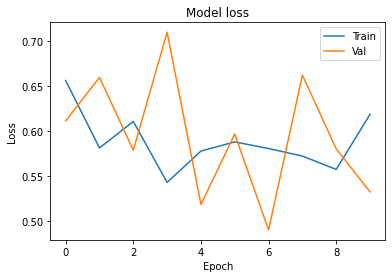

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

## Plot Train and Validation Accuracy

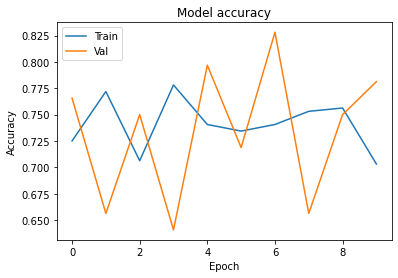

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## Evaluate the model on the test set and get accuracy (>70% expected)

In [ ]:
scores = model.evaluate(test_gen, steps=len(test_gen))
print(scores)
print('Model accuracy: {}'.format(scores[1]))

87/87 [==============================] - 26s 300ms/step - loss: 0.5807 - accuracy: 0.7381
[0.5806981325149536, 0.7381383776664734]
Model accuracy: 0.7381383776664734


In [ ]:
### test cell 6 ###
scores[1]

0.7381383776664734

## Test the model on the test set and report confusion matrix, and identify any issues

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


# TODO: report confusion matrix on test set (test_gen)
Y_pred = model.predict(test_gen)
confusion_matrix(test_gen.classes,np.argmax(Y_pred,axis=1))
# Issue is clearly that due to imbalanced data, accuracy = 0.7381 as all predictions = 1 ###


array([[   0,  723],
       [   0, 2038]])

In [ ]:
### Classification report ###
classification_report(test_gen.classes,np.argmax(Y_pred,axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       723\n           1       0.74      1.00      0.85      2038\n\n    accuracy                           0.74      2761\n   macro avg       0.37      0.50      0.42      2761\nweighted avg       0.54      0.74      0.63      2761\n'

In [ ]:
### Test cell ###
sum(test_gen.classes==np.argmax(Y_pred,axis=1))


2038

In [ ]:
### Test cell ###
from collections import Counter
Counter(np.argmax(Y_pred,axis=1))
#Counter(np.where(np.argmax(Y_pred, axis = 1)>0,1,-1))


## Perform Hyperparamter Tuning, transfer learning, or other approaches to further improve the learning performance

In [ ]:
import keras 
import tensorflow 
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Conv3D, MaxPooling3D,GlobalAveragePooling3D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras import backend as K
from __future__ import print_function
img_rows, img_cols = 299, 299
input_shape = (img_rows, img_cols, 1)

#TODO: compelte a CNN model using Keras in the following function



def my_model(hp):
  model = Sequential()
  hp_units1 = hp.Int('units1', min_value=32, max_value=1028, step=32)
  hp_units2 = hp.Int('units2', min_value=32, max_value=1028, step=32)
  hp_units3 = hp.Int('units3', min_value=32, max_value=1028, step=32)
  model.add(Conv2D(32, kernel_size=(3, 3),
                  input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="same"))
  model.add(Conv2D(64, kernel_size=(3, 3),
                  activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2, 2), padding="same"))
  model.add(Conv2D(128,kernel_size=(3,3),
                  activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="same"))
  model.add(Conv2D(256,kernel_size=(3,3),
                  activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="same"))
  model.add(Flatten())
  model.add(Dense(units=hp_units1, activation='relu'))
  model.add(Dense(units=hp_units2, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(units=hp_units3, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  hp_learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  opt=SGD(lr=hp_learning_rate)
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=opt,
                metrics=['accuracy'])
  return model 


  

  
    
  

  
    


In [ ]:
epoch=30 # choose the value for this hyperparameter wisely.



# fit the model
history1=model.fit(train_gen, steps_per_epoch=len(train_gen) // batch_size, validation_steps=len(test_gen) // batch_size, validation_data=test_gen, epochs=epoch,verbose=1)


Epoch 1/50
10/10 [==============================] - 15s 717ms/step - loss: 0.6352 - accuracy: 0.7406 - val_loss: 0.6169 - val_accuracy: 0.7031
Epoch 2/50
10/10 [==============================] - 7s 643ms/step - loss: 0.5950 - accuracy: 0.7375 - val_loss: 0.5915 - val_accuracy: 0.7500
Epoch 3/50
10/10 [==============================] - 7s 644ms/step - loss: 0.5881 - accuracy: 0.7312 - val_loss: 0.6243 - val_accuracy: 0.7031
Epoch 4/50
10/10 [==============================] - 7s 643ms/step - loss: 0.5827 - accuracy: 0.7375 - val_loss: 0.5109 - val_accuracy: 0.8125
Epoch 5/50
10/10 [==============================] - 7s 647ms/step - loss: 0.5829 - accuracy: 0.7344 - val_loss: 0.5178 - val_accuracy: 0.8125
Epoch 6/50
10/10 [==============================] - 7s 644ms/step - loss: 0.6051 - accuracy: 0.7156 - val_loss: 0.6315 - val_accuracy: 0.6719
Epoch 7/50
10/10 [==============================] - 7s 647ms/step - loss: 0.5900 - accuracy: 0.7281 - val_loss: 0.5407 - val_accuracy: 0.7812
Epoch

In [ ]:
import keras_tuner as kt

In [ ]:
tuner = kt.RandomSearch(
    my_model,
    objective='val_accuracy',
    max_trials=5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
tuner.search(train_gen, epochs=5, validation_data=test_gen)

Trial 6 Complete [00h 11m 24s]
val_accuracy: 0.7381383776664734

Best val_accuracy So Far: 0.7881202697753906
Total elapsed time: 01h 03m 01s

Search: Running Trial #7

Hyperparameter    |Value             |Best Value So Far 
units1            |256               |768               
units2            |480               |448               
units3            |832               |64                
learning_rate     |0.0001            |0.01              

Epoch 1/5
 48/346 [===>..........................] - ETA: 1:34 - loss: 0.6868 - accuracy: 0.7318

KeyboardInterrupt: ignored

In [1]:
import keras 
import tensorflow 
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Conv3D, MaxPooling3D,GlobalAveragePooling3D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras import backend as K
from __future__ import print_function
img_rows, img_cols = 299, 299
input_shape = (img_rows, img_cols, 1)

#TODO: compelte a CNN model using Keras in the following function

def my_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                  input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="same"))
  model.add(Conv2D(64, kernel_size=(3, 3),
                  activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2, 2), padding="same"))
  model.add(Conv2D(128,kernel_size=(3,3),
                  activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="same"))
  model.add(Conv2D(256,kernel_size=(3,3),
                  activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="same"))
  model.add(Flatten())
  model.add(Dense(768, activation='relu'))
  model.add(Dense(448, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  opt=SGD(lr=0.01)
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=opt,
                metrics=['accuracy'])
  return model 


  

  
    


In [ ]:
epoch=5 # choose the value for this hyperparameter wisely.

model = my_model() 


# fit the model
history1=model.fit(train_gen, steps_per_epoch=len(train_gen) // batch_size, validation_steps=len(test_gen) // batch_size, validation_data=test_gen, epochs=epoch,verbose=1)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
10/10 [==============================] - 9s 481ms/step - loss: 0.6377 - accuracy: 0.7344 - val_loss: 0.5588 - val_accuracy: 0.8125
Epoch 2/5
10/10 [==============================] - 4s 434ms/step - loss: 0.5988 - accuracy: 0.7281 - val_loss: 0.6090 - val_accuracy: 0.7188
Epoch 3/5
10/10 [==============================] - 4s 430ms/step - loss: 0.5358 - accuracy: 0.7875 - val_loss: 0.5342 - val_accuracy: 0.7812
Epoch 4/5
10/10 [==============================] - 4s 430ms/step - loss: 0.6025 - accuracy: 0.7250 - val_loss: 0.5449 - val_accuracy: 0.7812
Epoch 5/5
10/10 [==============================] - 4s 431ms/step - loss: 0.5643 - accuracy: 0.7531 - val_loss: 0.5507 - val_accuracy: 0.7656


In [ ]:
### For transfer learning ###

from keras.preprocessing.image import ImageDataGenerator

path = '/content/COVID-19Subset' # you may need to change the path based on your own enviroment

classes=["COVID",  "Normal"]
num_classes = len(classes)
print(num_classes)
batch_size=32

#split data into train and test
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest", rescale=1./255, validation_split=0.2)

#load training image set
train_gen = datagen.flow_from_directory(directory=path, 
                                              target_size=(299, 299),
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True, classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="rgb")
#load testing set
test_gen = datagen.flow_from_directory(directory=path, 
                                              target_size=(299, 299),
                                              class_mode='categorical',
                                              subset='validation',
                                              shuffle=True, classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="rgb")




2
Found 11047 images belonging to 2 classes.
Found 2761 images belonging to 2 classes.


In [ ]:
### Model for transfer learning ###
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.xception import Xception
import numpy as np
from keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import InceptionV3
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Conv3D, MaxPooling3D,GlobalAveragePooling3D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D

inputs_tensor=keras.Input(shape=(299,299,3))

base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(299, 299, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False


# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(inputs_tensor, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1024,activation='relu')(x)
x= keras.layers.Dense(2048, activation='relu')(x)
x=keras.layers.Dense(2048,activation='relu')(x)
x=keras.layers.Dense(1024,activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)  # Regularize with dropout
output = keras.layers.Dense(2,activation='softmax')(x)
model = keras.Model(inputs=inputs_tensor, outputs=output)

model.summary()
model.compile(
    optimizer=keras.optimizers.Adadelta(),
    loss=tf.losses.categorical_crossentropy,
    metrics=['accuracy'],
)

83697664/83683744 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten_2 (Flatten)         (None, 204800)            0         
                                                                 
 dense_8 (Dense)             (None, 1024)              209716224 
                                                                 
 dense_9 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_10 (Dense)            (None, 2048)              4196352   
                                                              

In [ ]:
### test cell 7 ###
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
history2=model.fit(train_gen, steps_per_epoch=len(train_gen) // batch_size, validation_steps=len(test_gen) // batch_size, validation_data=test_gen, epochs=(10),verbose=1) 

Epoch 1/10
10/10 [==============================] - 18s 1s/step - loss: 0.6717 - accuracy: 0.6031 - val_loss: 0.5944 - val_accuracy: 0.7812
Epoch 2/10
10/10 [==============================] - 12s 1s/step - loss: 0.5726 - accuracy: 0.7469 - val_loss: 0.5342 - val_accuracy: 0.7500
Epoch 3/10
10/10 [==============================] - 12s 1s/step - loss: 0.5486 - accuracy: 0.7344 - val_loss: 0.5986 - val_accuracy: 0.6406
Epoch 4/10
10/10 [==============================] - 12s 1s/step - loss: 0.5147 - accuracy: 0.7437 - val_loss: 0.5178 - val_accuracy: 0.7188
Epoch 5/10
10/10 [==============================] - 12s 1s/step - loss: 0.5232 - accuracy: 0.7031 - val_loss: 0.4880 - val_accuracy: 0.7188
Epoch 6/10
10/10 [==============================] - 12s 1s/step - loss: 0.5028 - accuracy: 0.7469 - val_loss: 0.4872 - val_accuracy: 0.7500
Epoch 7/10
10/10 [==============================] - 12s 1s/step - loss: 0.5025 - accuracy: 0.7375 - val_loss: 0.4533 - val_accuracy: 0.7344
Epoch 8/10
10/10 [==

In [ ]:
scores = model.evaluate(test_gen, steps=len(test_gen))
print(scores)
print('Model accuracy: {}'.format(scores[1]))

87/87 [==============================] - 75s 855ms/step - loss: 0.3226 - accuracy: 0.8606
[0.32258617877960205, 0.8605577945709229]
Model accuracy: 0.8605577945709229


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


# TODO: report confusion matrix on test set (test_gen)
Y_pred = model.predict(test_gen)
confusion_matrix(test_gen.classes,np.argmax(Y_pred,axis=1))



array([[ 143,  580],
       [ 320, 1718]])